In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
            discriminant_analysis, random_projection)
import random
from sklearn.preprocessing import normalize

              fid           mjd          ra       dec  magpsf_corr  \
oid                                                                  
ZTF18abefyya    2  58647.293681  274.347583 -7.689340    16.893037   
ZTF18abefyya    2  58575.459016  274.347481 -7.689254    17.355343   
ZTF18abefyya    2  58608.481921  274.347531 -7.689337    17.325110   
ZTF18abefyya    2  58607.356933  274.347498 -7.689360    17.328151   
ZTF18abefyya    2  58605.439329  274.347495 -7.689260    17.296300   

              sigmapsf_corr  
oid                          
ZTF18abefyya       0.024026  
ZTF18abefyya       0.034980  
ZTF18abefyya       0.038761  
ZTF18abefyya       0.039293  
ZTF18abefyya       0.036019  
             classALeRCE          ra        dec     period     source  \
oid                                                                     
ZTF18aakyuls         RRL  275.710304  36.051157   0.550747  CRTSnorth   
ZTF18abnznco         RRL  359.935451  17.656745  0.2710382     ASASSN   
ZTF18aa

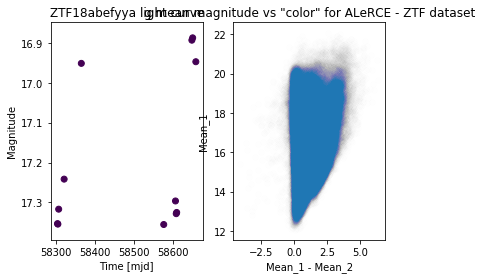

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


detections = pd.read_pickle('C:/Users/sebas/Desktop/Ingenieria/8 semestre/Inteligencia Computacional/proyecto/data_representativity/detections_664k.pkl')
features = pd.read_pickle('C:/Users/sebas/Desktop/Ingenieria/8 semestre/Inteligencia Computacional/proyecto/data_representativity/features_664k.pkl')
labels = pd.read_pickle('C:/Users/sebas/Desktop/Ingenieria/8 semestre/Inteligencia Computacional/proyecto/data_representativity/labels.pkl')

print(detections.head())
print(labels.head())

# How are the classes distributed?
print(labels[['classALeRCE', 'ra']].groupby('classALeRCE').count())

# Plot an object
first_object_oid = detections.index.values[0]#20760278
first_object_detections = detections.loc[first_object_oid]

print(f'Object {first_object_oid} has {len(first_object_detections)} detections')

plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(
    first_object_detections.mjd,
    first_object_detections.magpsf_corr,
    c=first_object_detections.fid)

# In astronomy we plot the magnitude axis inverted (higher magnitude, dimmer objects)
plt.gca().invert_yaxis()
plt.xlabel('Time [mjd]')
plt.ylabel('Magnitude')
plt.title(f'{first_object_oid} light curve')

# Let's do a simple scatter of two features
means = features[['Mean_1', 'Mean_2']].copy()
means.dropna(inplace=True)

plt.subplot(1, 2, 2)
plt.scatter(
    means.values[:, 0] - means.values[:, 1],
    means.values[:, 0],
    alpha=0.005
)
plt.ylabel('Mean_1')
plt.xlabel('Mean_1 - Mean_2')
plt.title('g mean magnitude vs "color" for ALeRCE - ZTF dataset')
plt.show()

In [3]:
DFclas=features.loc[labels.index]
DFclas=DFclas.dropna()
a=[]
for i in range(len(DFclas.index)):
    a.append(labels.loc[DFclas.index[i]][0])

DFclas2=DFclas
DFclas['clase']=a

RRL1000=DFclas['clase']=='RRL'
dfRRL=DFclas[RRL1000]
AGNI=DFclas['clase']=='AGN-I'
dfAGNI=DFclas[AGNI]
Blazar=DFclas['clase']=='Blazar'
dfBlazar=DFclas[Blazar]
CVNova=DFclas['clase']=='CV/Nova'
dfCVNova=DFclas[CVNova]
EBC=DFclas['clase']=='EBC'
dfEBC=DFclas[EBC]
EBSDD=DFclas['clase']=='EBSD/D'
dfEBSDD=DFclas[EBSDD]
LPV=DFclas['clase']=='LPV'
dfLPV=DFclas[LPV]
PeriodicOther=DFclas['clase']=='Periodic-Other'
dfPO=DFclas[PeriodicOther]
SNIa=DFclas['clase']=='SNIa'
dfSNIa=DFclas[SNIa]
Ceph=DFclas['clase']=='Ceph'
dfCeph=DFclas[Ceph]
DSCT=DFclas['clase']=='DSCT'
dfDSCT=DFclas[DSCT]
SNII=DFclas['clase']=='SNII'
dfSNII=DFclas[SNII]
SNIa=DFclas['clase']=='SNIa'
dfSNIa=DFclas[SNIa]

DFequal2=pd.concat([dfRRL[0:100],dfAGNI[0:100],dfBlazar[0:100],dfCVNova[0:100],dfEBC[0:100],dfEBSDD[0:100],dfLPV[0:100],dfPO[0:100],dfCeph[0:100],dfDSCT[0:100],dfSNII[0:100],dfSNIa[0:100]])
DFequal2.head()

,n_samples_1,Amplitude_1,AndersonDarling_1,Autocor_length_1,Beyond1Std_1,Con_1,Eta_e_1,Gskew_1,MaxSlope_1,Mean_1,...,ExcessVar_2,GP_DRW_sigma_2,GP_DRW_tau_2,SF_ML_amplitude_2,SF_ML_gamma_2,IAR_phi_2,LinearTrend_2,gal_b,gal_l,clase
oid,,,,,,,,,,,,,,,,,,,,,
ZTF18aakyuls,36.0,0.548401,0.980684,1.0,0.361111,0.0,1.270494,-0.228940,0.138083,17.068348,...,0.000251,0.072333,0.383776,0.404268,-6.619229e-03,0.996894,0.000338,20.971334,63.714680,RRL
ZTF18abnznco,28.0,0.204916,1.000000,1.0,0.392857,0.0,0.024958,-0.090507,0.140619,13.972252,...,0.000066,0.012926,0.297749,0.169156,-9.205407e-09,0.991869,-0.000340,-43.493407,105.847646,RRL
ZTF18aaadcnp,39.0,0.327207,1.000000,1.0,0.461538,0.0,0.653078,-0.135736,0.110238,15.186460,...,0.000097,0.020471,5.087895,0.266094,1.037024e-01,0.236068,0.000048,68.819694,158.479874,RRL
ZTF18aaactjb,60.0,0.349150,1.000000,1.0,0.416667,0.0,0.008650,-0.241208,60.593587,15.686243,...,0.000141,0.035444,0.189598,0.245191,-2.250942e-02,0.994975,-0.000137,39.860309,169.920868,RRL
ZTF18abrntoc,18.0,0.245114,0.999979,1.0,0.444444,0.0,2.131320,-0.216678,0.137048,15.511325,...,0.000096,0.022306,0.188424,0.229629,5.390245e-02,0.998081,-0.000506,-27.591426,30.874000,RRL


In [4]:
DFequal2

,n_samples_1,Amplitude_1,AndersonDarling_1,Autocor_length_1,Beyond1Std_1,Con_1,Eta_e_1,Gskew_1,MaxSlope_1,Mean_1,...,ExcessVar_2,GP_DRW_sigma_2,GP_DRW_tau_2,SF_ML_amplitude_2,SF_ML_gamma_2,IAR_phi_2,LinearTrend_2,gal_b,gal_l,clase
oid,,,,,,,,,,,,,,,,,,,,,
ZTF18aakyuls,36.0,0.548401,0.980684,1.0,0.361111,0.0,1.270494,-0.228940,0.138083,17.068348,...,0.000251,0.072333,0.383776,0.404268,-6.619229e-03,0.996894,0.000338,20.971334,63.714680,RRL
ZTF18abnznco,28.0,0.204916,1.000000,1.0,0.392857,0.0,0.024958,-0.090507,0.140619,13.972252,...,0.000066,0.012926,0.297749,0.169156,-9.205407e-09,0.991869,-0.000340,-43.493407,105.847646,RRL
ZTF18aaadcnp,39.0,0.327207,1.000000,1.0,0.461538,0.0,0.653078,-0.135736,0.110238,15.186460,...,0.000097,0.020471,5.087895,0.266094,1.037024e-01,0.236068,0.000048,68.819694,158.479874,RRL
ZTF18aaactjb,60.0,0.349150,1.000000,1.0,0.416667,0.0,0.008650,-0.241208,60.593587,15.686243,...,0.000141,0.035444,0.189598,0.245191,-2.250942e-02,0.994975,-0.000137,39.860309,169.920868,RRL
ZTF18abrntoc,18.0,0.245114,0.999979,1.0,0.444444,0.0,2.131320,-0.216678,0.137048,15.511325,...,0.000096,0.022306,0.188424,0.229629,5.390245e-02,0.998081,-0.000506,-27.591426,30.874000,RRL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF19aawafvn,8.0,0.830253,0.449345,1.0,0.250000,0.0,0.515834,0.585649,0.143909,18.669743,...,0.000635,0.269649,11.116252,0.936338,8.453065e-02,0.996894,0.005543,66.637889,46.685354,SNIa
ZTF19aatgznl,6.0,0.885160,0.772581,1.0,0.333333,0.0,0.288993,0.536621,0.125601,18.896845,...,0.000863,0.408822,33.853265,4.121935,5.954347e-01,0.998814,0.025318,68.853102,75.897117,SNIa
ZTF19aayabqe,6.0,0.657821,0.496451,2.0,0.333333,0.0,0.195387,0.169550,-0.085653,19.592648,...,0.000740,0.376457,19.385894,3.169885,3.860978e-01,0.978714,0.030585,42.325437,92.226125,SNIa


In [4]:
n=1199
aleatorios = [random.randint(0,256983) for _ in range(n)]
dfsinetiq = features.drop(labels.index)
dfsinetiq=dfsinetiq.dropna()
df=dfsinetiq.iloc[aleatorios]
df['clase']='sin-clase'
DFalldata=pd.concat([DFequal2,df])
dff=DFalldata.iloc[:,0:96]
data_norm=(dff-dff.min())/(dff.max()-dff.min())
data_norm

C:\Users\sebas\Anaconda3\envs\funcionapls\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,n_samples_1,Amplitude_1,AndersonDarling_1,Autocor_length_1,Beyond1Std_1,Con_1,Eta_e_1,Gskew_1,MaxSlope_1,Mean_1,...,Pvar_2,ExcessVar_2,GP_DRW_sigma_2,GP_DRW_tau_2,SF_ML_amplitude_2,SF_ML_gamma_2,IAR_phi_2,LinearTrend_2,gal_b,gal_l
oid,,,,,,,,,,,,,,,,,,,,,
ZTF18aakyuls,0.114943,0.165217,0.977856,0.000000,0.521071,0.0,0.097650,0.516807,0.000158,0.550076,...,1.0,0.017400,0.005204,0.000184,3.875657e-07,0.025168,0.996894,0.193680,0.597306,0.175885
ZTF18abnznco,0.084291,0.059466,1.000000,0.000000,0.569404,0.0,0.001918,0.534167,0.000160,0.184275,...,1.0,0.007048,0.000930,0.000143,1.621672e-07,0.025314,0.991869,0.190403,0.217501,0.293132
ZTF18aaadcnp,0.126437,0.097116,1.000000,0.000000,0.673973,0.0,0.050195,0.528495,0.000139,0.327733,...,1.0,0.008796,0.001473,0.002440,2.551003e-07,0.027599,0.236068,0.192282,0.879213,0.439596
ZTF18aaactjb,0.206897,0.103872,1.000000,0.000000,0.605655,0.0,0.000665,0.515269,0.042978,0.386782,...,1.0,0.011218,0.002550,0.000091,2.350605e-07,0.024818,0.994975,0.191384,0.708594,0.471434
ZTF18abrntoc,0.045977,0.071842,0.999976,0.000000,0.647947,0.0,0.163813,0.518345,0.000158,0.366115,...,1.0,0.008701,0.001605,0.000090,2.201414e-07,0.026502,0.998081,0.189602,0.311190,0.084497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF18aakszuw,0.000000,0.082972,0.999971,0.000000,0.225026,0.0,0.010252,0.612454,0.000066,0.507076,...,1.0,0.005836,0.000720,0.001436,9.715711e-08,0.018592,0.926846,0.193899,0.788098,0.168339
ZTF18abdkedu,0.072797,0.105044,0.999198,0.000000,0.580280,0.0,0.065124,0.528519,0.000280,0.490751,...,1.0,0.007791,0.001409,0.000010,1.973633e-07,0.027326,0.012524,0.193469,0.496772,0.175686
ZTF18aawblup,0.218391,0.387144,0.997937,0.235294,0.623780,0.0,0.007901,0.544657,0.000378,0.645280,...,1.0,0.131176,0.039688,0.067044,8.072147e-07,0.024820,0.381966,0.180752,0.456106,0.163444


In [5]:
from parametric_tSNE import Parametric_tSNE

In [6]:
high_dims = data_norm.shape[1]
num_outputs = 2
perplexity = 40
ptSNE = Parametric_tSNE(high_dims, num_outputs, perplexity)
ptSNE.fit(data_norm)
output_res = ptSNE.transform(data_norm)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


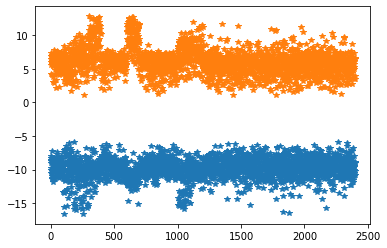

In [10]:
import matplotlib.pyplot as plt
plt.plot(output_res,'*')
plt.size()

In [7]:
len(output_res)

2398

Text(0.5, 1.0, 't-SNE')

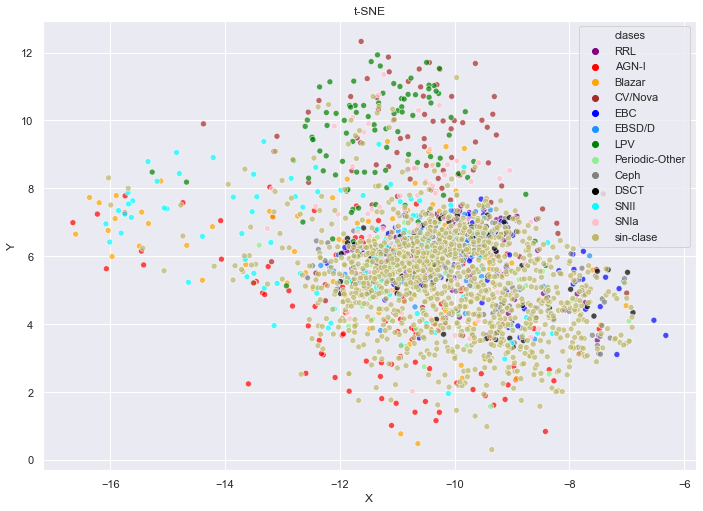

In [8]:
y=DFalldata.iloc[:,96]
tsne_df = pd.DataFrame({'X':output_res[:,0],
                        'Y':output_res[:,1],
                        'clases':y})



import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x="X", y="Y",
              hue="clases",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen','gray','black','aqua','pink','darkkhaki',],
              legend='full',
              data=tsne_df,alpha=0.7);
plt.title('t-SNE')

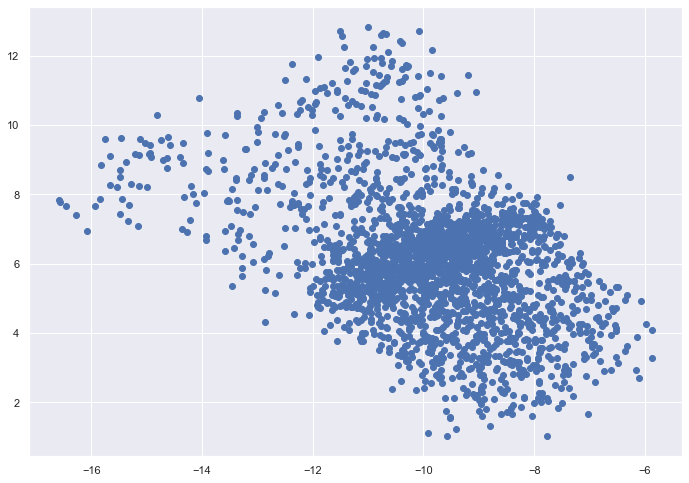

In [27]:
plt.scatter(tsne_df['X'],tsne_df['Y'])

In [25]:
tsne_df[]

,X,Y,clases
oid,,,
ZTF18aakyuls,-9.826071,6.384311,RRL
ZTF18abnznco,-8.240502,4.293944,RRL
ZTF18aaadcnp,-8.550776,5.558441,RRL
ZTF18aaactjb,-8.000816,7.368419,RRL
ZTF18abrntoc,-8.734213,6.862537,RRL
...,...,...,...
ZTF19aaafotm,-10.177100,6.669629,sin-clase
ZTF18abkxdge,-10.796427,3.515478,sin-clase
ZTF18abcttmm,-8.852178,6.617119,sin-clase


In [7]:
#muestra el conjunto de datos sin los target
X = DFalldata.drop(['clase'],axis='columns')
#muestra el vector de los target de DFclas
Y=DFalldata.iloc[:,-1]

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, stratify=Y)

classifier = RandomForestClassifier(n_estimators=40,max_depth=30)
classifier.fit(X_train, Y_train)

feature_importances = classifier.feature_importances_
importance_order = np.argsort(-feature_importances)
feature_names = DFalldata.columns.values

In [8]:
suma=0
indice=0
algo=np.sort(feature_importances)[::-1]
for i in range(len(algo)):
    if suma<=0.8:
        suma = suma+algo[i]
        indice=i
print(indice)
print(suma)


59
0.8022143694661981


In [9]:
NuevaData1 = DFalldata[DFalldata.columns.values[importance_order[0:59]]]
dff2=NuevaData1

In [10]:
dff2

,gal_b,Mean_2,Mean_1,PeriodLS_v2_1,LinearTrend_1,GP_DRW_tau_1,GP_DRW_sigma_1,PeriodLS_v2_2,ExcessVar_1,Amplitude_2,...,Harmonics_mag_3_1,IAR_phi_1,Psi_CS_v2_2,AndersonDarling_1,Psi_CS_v2_1,Psi_eta_v2_2,Harmonics_mse_2,Skew_1,Harmonics_phase_6_1,Harmonics_mag_6_2
oid,,,,,,,,,,,,,,,,,,,,,
ZTF18aakyuls,20.971334,16.883701,17.068348,0.550752,0.000227,2.382625,0.104793,0.354786,3.591689e-04,0.406951,...,0.099861,0.998814,0.276761,0.980684,0.300020,0.437816,108.926384,-0.332212,-0.657984,0.023287
ZTF18abnznco,-43.493407,13.978452,13.972252,0.271047,-0.000484,4.517906,0.024380,0.085625,1.197126e-04,0.134211,...,0.003697,0.033603,0.484940,1.000000,0.317921,1.191070,0.019055,-0.031281,0.852468,0.006121
ZTF18aaadcnp,68.819694,14.895173,15.186460,0.753523,0.000463,6.646177,0.031104,0.753466,1.550329e-04,0.190510,...,0.027764,0.994975,0.392166,1.000000,0.260005,0.438580,7.014696,-0.059225,-0.536038,0.012021
ZTF18aaactjb,39.860309,15.660820,15.686243,0.321172,0.000351,0.336795,0.077801,0.321172,3.281107e-04,0.240592,...,0.036293,0.998081,0.278958,1.000000,0.323929,0.235658,100.398721,-0.117889,-5.293114,0.003722
ZTF18abrntoc,-27.591426,15.296155,15.511325,0.353344,0.000385,0.159206,0.035977,0.353344,1.492984e-04,0.190337,...,0.036444,0.994975,0.321357,0.999979,0.319738,1.597116,2.053215,-0.370052,0.045651,0.006126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF18aazwdnp,-7.623814,14.107398,14.622018,0.617818,0.000094,0.067434,0.004468,0.864678,2.087847e-05,0.124549,...,0.011878,0.998814,0.289120,1.000000,0.286272,1.430950,13.036602,-0.288235,-0.435013,0.019165
ZTF18abvftlk,29.129680,17.006281,18.320601,0.126920,-0.000865,1.707241,0.145845,0.126923,4.104785e-04,0.488632,...,0.035615,0.964438,0.277596,0.999999,0.328895,0.207146,8.234702,-0.786289,4.148677,0.018284
ZTF18aaafhal,11.852500,15.749776,16.400387,0.154598,0.000562,0.058709,0.049629,0.154576,1.880253e-04,0.270852,...,0.026886,0.991869,0.323823,1.000000,0.334823,0.388636,44.554376,0.755840,-0.057950,0.020044


In [11]:
high_dims = dff2.shape[1]
num_outputs = 2
perplexity = 30
ptSNE = Parametric_tSNE(high_dims, num_outputs, perplexity)
ptSNE.fit(dff2)
output_res = ptSNE.transform(dff2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Text(0.5, 1.0, 't-SNE')

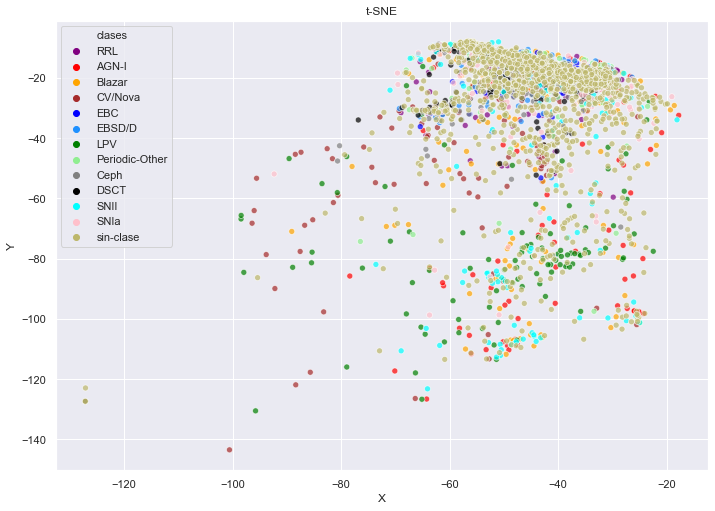

In [12]:
y=DFalldata.iloc[:,96]
tsne_df = pd.DataFrame({'X':output_res[:,0],
                        'Y':output_res[:,1],
                        'clases':y})



import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x="X", y="Y",
              hue="clases",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen','gray','black','aqua','pink','darkkhaki',],
              legend='full',
              data=tsne_df,alpha=0.7);
plt.title('t-SNE')